# MACD with real data

This notebook shows the basic steps to begin to use downloaded NASDAQ csv stock price data.

*Follow the links below to download the csv and save it in the same directory as this notebook.*

The steps are:
1. Reading the data from the csv file into a pandas dataframe.
2. Cleaning up the data.
3. Plotting the data.


Data Source: [NASDAQ](https://www.nasdaq.com/), [Historical Quotes](https://www.nasdaq.com/market-activity/stocks/pep/historical)

## Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# MACD and EMA Functions
from MACDRealDataHelperFunctions import *


## Data Import and Data Cleaning

In [2]:
# Import and Clean Data
def importAndCleanData(file_name):
    
    # Ingest the csv file into a pandas dataframe.
    df = pd.read_csv(str(file_name))

    # Remove dollar signs using df.replace()
    try:
        columns_with_dollars = [' Close/Last', ' Open', ' High', ' Low']
        df[columns_with_dollars] = df[columns_with_dollars].replace({'\$':''}, regex=True)
    except:
        print("No dollar signs ($) to remove.")

    # Convert object datatype to float
    df[columns_with_dollars] = df[columns_with_dollars].astype(float)

    # Reverse the spreadsheet to begin with oldest date and end with newest date.
    df = df[::-1] # This reverses the order, but doesn't change the index numbers.
    df = df.reset_index(drop=True) # This overwrites the index numbers to start from zero.

    #df # Prints the dataframe. Useful for debugging.
    return df

file_name = 'HistoricalQuotes-PEP-6M.csv'
df = importAndCleanData(file_name)

## Data Plotting

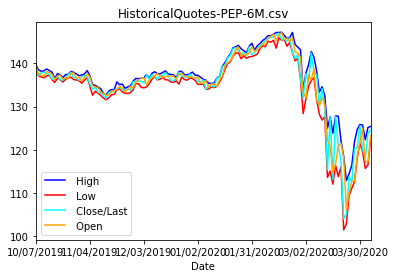

In [3]:
# Plot raw data from dataframe
def plotDataframe(df, file_name):

    # Plot the data.
    ax = plt.gca() # gca stands for 'get current axis'

    df.plot(kind='line',x='Date',y=' High', color='blue',ax=ax)
    df.plot(kind='line',x='Date',y=' Low', color='red', ax=ax)
    df.plot(kind='line',x='Date',y=' Close/Last', color='cyan',ax=ax)
    df.plot(kind='line',x='Date',y=' Open', color='orange', ax=ax, title=str(file_name))
    #df.plot(title="ya dangus")
    
    plt.show()
    
plotDataframe(df, file_name)

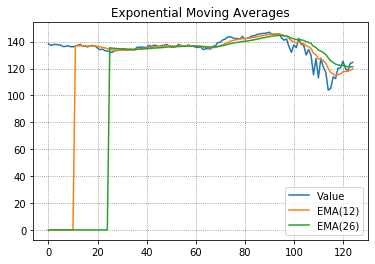

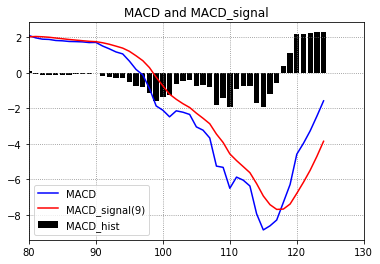

In [4]:

# Wrapper Function for EMAs and MACD Calculation/Plotting
def wrapper(df, ema_short_period, ema_long_period, macd_signal_period, plot_x_start, plot_x_end):

    # We will use the closing price for our analysis.
    value_data = df[' Close/Last']

    # We can use the dates as labels for the x axis.
    date_data = df['Date']

    # Run MACD Calculations
    x, short_data, long_data, MACD, MACD_signal, MACD_bars = getMACD(value_data, ema_short_period, ema_long_period, macd_signal_period)

    # Plot Results
    calculateAndPlotEMA(value_data, ema_short_period, ema_long_period)
    plotMACD(x, MACD, MACD_signal, macd_signal_period, MACD_bars, plot_x_start, plot_x_end)

# MACD Parameters
ema_short_period = 12
ema_long_period = 26
macd_signal_period = 9

# MACD Plotting Parameters
plot_x_start = 80
plot_x_end = 130

# Run everything
wrapper(df, ema_short_period, ema_long_period, macd_signal_period, plot_x_start, plot_x_end)

## Let's see what a different ticker looks like

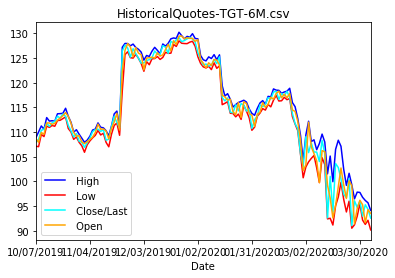

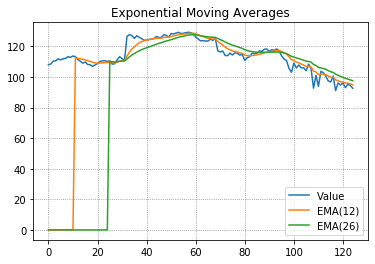

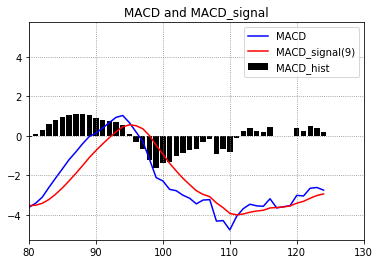

In [5]:
# Prepare the data
file_name = 'HistoricalQuotes-TGT-6M.csv' # Target Corp. 6 months of data.
df = importAndCleanData(file_name) 
plotDataframe(df, file_name)

# MACD Parameters
ema_short_period = 12
ema_long_period = 26
macd_signal_period = 9
plot_x_start = 80
plot_x_end = 130

# Run everything
wrapper(df, ema_short_period, ema_long_period, macd_signal_period, plot_x_start, plot_x_end)

No dollar signs ($) to remove.


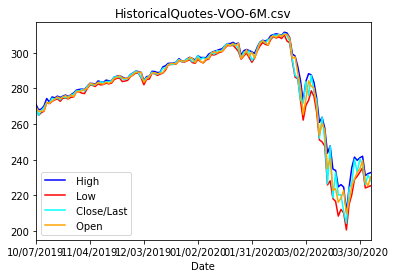

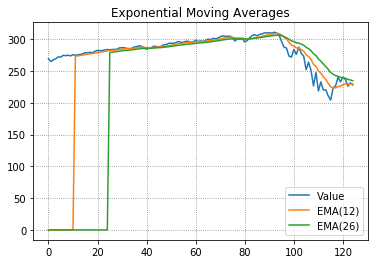

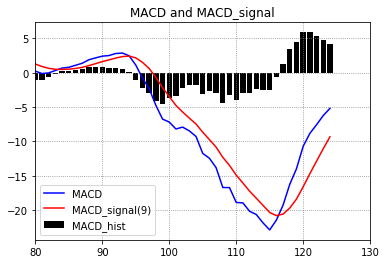

In [6]:
# Prepare the data
file_name = 'HistoricalQuotes-VOO-6M.csv' # Vanguard 500 ETF, 6 months of data. Note, does NOT have $ signs.
df = importAndCleanData(file_name) 
plotDataframe(df, file_name)

# MACD Parameters
ema_short_period = 12
ema_long_period = 26
macd_signal_period = 9
plot_x_start = 80
plot_x_end = 130

# Run everything
wrapper(df, ema_short_period, ema_long_period, macd_signal_period, plot_x_start, plot_x_end)